In [83]:
import matplotlib
%matplotlib inline

In [1]:
import Bio

In [2]:
import pandas as pd
import numpy as np

Clean up the `Resfams.tbl` file by making it tab delimited and stripping off the header, footer, and small woodland creatures that inhabit it.  Save to `Resfams.tsv`.

In [3]:
with open('Resfams.tbl', 'rt') as input, open('Resfams.tsv', 'wt') as output:
    line_no = 1;
    for line in input:
        fields = line.split()
        if fields:
            if fields[0][0] != '#':
                if len(fields) < 19:
                    raise Exception("Incorrect number of fields", "Line %d has fewer than 19 fields after initial split" % line_no)
                else:
                    for field in fields[:18]:
                        output.write("%s\t" % field.replace('"', ''))
                    for field in fields[18:len(fields)-1]:
                        output.write("%s " % field.replace('"', ''))
                    output.write("%s\n" % fields[len(fields)-1].replace('"', ''))
            else:
                pass
        line_no += 1

Read the modified table using the fixed width reader.  Note we manually specify the dtypes and column names and skip the header and footer.  Bummer.

In [4]:
df = pd.read_csv('Resfams.tsv', sep='\t', engine='python',
    header=None, error_bad_lines=False, warn_bad_lines=True,
    names=[ "target", "target_accession", "query", "query_accesion", "full_evalue", "full_score", 
           "full_bias", "best_evalue", "best_score", "best_bias", "exp", "reg", "clu", "ov", "env", 
           "dom", "rep", "inc", "description"],
    dtype={
        "target" : object, 
        "target_accession" : object, 
        "query" : object, 
        "query_accesion" : object, 
        "full_evalue" : np.float64, 
        "full_score" : np.float64, 
        "full_bias" : np.float64, 
        "best_evalue" : np.float64, 
        "best_score" : np.float64, 
        "best_bias" : np.float64, 
        "exp" : np.float64, 
        "reg" : np.float64, 
        "clu" : np.int64, 
        "ov" : np.int64, 
        "env" : np.int64, 
        "dom" : np.int64, 
        "rep" : np.int64, 
        "inc" : np.int64, 
        "description" : object, 
    })
df.head()

,target,target_accession,query,query_accesion,full_evalue,full_score,full_bias,best_evalue,best_score,best_bias,exp,reg,clu,ov,env,dom,rep,inc,description
0,CTXM,RF0059,NP_774964.1,-,4.700000e-193,632.8,4.5,5.200000e-193,632.6,4.5,1.0,1.0,0,0,1,1,1,1,CTX-M beta-lactamase (class a) [ARO:3000016]
1,ClassA,RF0053,NP_774964.1,-,3.200000e-129,422.9,0.5,3.800000e-129,422.7,0.5,1.0,1.0,0,0,1,1,1,1,Class A beta-lactamase [ARO:3000078]
2,TEM,RF0126,NP_775035.1,-,1.800000e-205,673.4,0.0,2.000000e-205,673.2,0.0,1.0,1.0,0,0,1,1,1,1,TEM beta-lactamase (class a) [ARO:3000014]
3,ClassA,RF0053,NP_775035.1,-,1.700000e-130,427.1,0.0,1.900000e-130,426.9,0.0,1.0,1.0,0,0,1,1,1,1,Class A beta-lactamase [ARO:3000078]
4,AAC3,RF0002,NP_775040.1,-,3.400000e-146,478.6,0.4,3.900000e-146,478.4,0.4,1.0,1.0,0,0,1,1,1,1,Aminoglycoside Acetyltransferase (AAC3) [ARO:3...


In [7]:
df_min_evalue = df.loc[df.groupby("query")["full_evalue"].idxmin()]
df_min_evalue.shape

(1876, 19)

In [8]:
df_min_evalue.loc[df_min_evalue["query"] == 'NP_774964.1']

,target,target_accession,query,query_accesion,full_evalue,full_score,full_bias,best_evalue,best_score,best_bias,exp,reg,clu,ov,env,dom,rep,inc,description
0,CTXM,RF0059,NP_774964.1,-,4.700000e-193,632.8,4.5,5.200000e-193,632.6,4.5,1.0,1.0,0,0,1,1,1,1,CTX-M beta-lactamase (class a) [ARO:3000016]


In [23]:
df_min_evalue = df.loc[df.groupby("query")["full_evalue"].idxmin()]
df_min_evalue.shape

(1876, 19)

In [10]:
df_min_evalue.loc[df_min_evalue["query"] == 'NP_774964.1']

,target,target_accession,query,query_accesion,full_evalue,full_score,full_bias,best_evalue,best_score,best_bias,exp,reg,clu,ov,env,dom,rep,inc,description
0,CTXM,RF0059,NP_774964.1,-,4.700000e-193,632.8,4.5,5.200000e-193,632.6,4.5,1.0,1.0,0,0,1,1,1,1,CTX-M beta-lactamase (class a) [ARO:3000016]


In [14]:
lineages_table = pd.read_csv('lineages-2017-08-07.csv.gz', low_memory=False)

In [51]:
organism_table = pd.read_csv('organism_table.tsv', sep='\t')

In [52]:
df_min_organism = df_min_evalue.merge(organism_table, how='left', left_on = 'query', right_on = 'id')

In [53]:
df_min_organism.head()

,target,target_accession,query,query_accesion,full_evalue,full_score,full_bias,best_evalue,best_score,best_bias,...,ov,env,dom,rep,inc,description_x,Unnamed: 0,id,description_y,organism
0,ErmC,RF0071,NP_040407.1,-,1.200000e-171,561.4,23.2,1.400000e-171,561.3,23.2,...,0,1,1,1,1,ErmC: Erm 23S ribosomal RNA methyltransferase:...,36990,NP_040407.1,NP_040407.1 macrolide-lincosamide-streptogrami...,Bacillus subtilis
1,tet_MFS_efflux,RF0134,NP_040422.1,-,8.500000e-113,370.0,31.8,9.600000e-113,369.8,31.8,...,0,1,1,1,1,tetracycline resistance MFS efflux pump: selec...,36982,NP_040422.1,NP_040422.1 tetracycline resistance protein (p...,Streptococcus agalactiae
2,ANT,RF0166,NP_040433.1,-,3.200000e-80,262.1,0.0,3.600000e-80,262.0,0.0,...,0,1,1,1,1,Aminoglycoside Nucleotidyltransferase,57460,NP_040433.1,NP_040433.1 neomycin resistance protein (plasm...,Staphylococcus aureus
3,Chlor_Acetyltrans_CAT,RF0050,NP_040437.1,-,9.900000e-87,283.1,1.2,1.100000e-86,282.9,1.2,...,0,1,1,1,1,chloramphenicol acetyltransferase (CAT) [ARO:3...,3836,NP_040437.1,NP_040437.1 hypothetical protein pC194_p3 (pla...,Staphylococcus aureus
4,ErmC,RF0071,NP_040462.1,-,5.400000e-171,559.3,23.5,6.100000e-171,559.2,23.5,...,0,1,1,1,1,ErmC: Erm 23S ribosomal RNA methyltransferase:...,57456,NP_040462.1,NP_040462.1 macrolide-lincosamide-streptogrami...,Staphylococcus epidermidis


In [54]:
df_min_organism.shape

(1876, 23)

In [66]:
df_min_organism_lineages = df_min_organism.merge(lineages_table, how = 'left', left_on = 'organism', right_on = 'species')

In [67]:
df_min_organism_lineages.shape

(3202690, 76)

In [68]:
df_min_organism_lineages.head()

,target,target_accession,query,query_accesion,full_evalue,full_score,full_bias,best_evalue,best_score,best_bias,...,suborder,subphylum,subspecies,subtribe,superclass,superfamily,superorder,superphylum,tribe,varietas
0,ErmC,RF0071,NP_040407.1,-,1.200000e-171,561.4,23.2,1.400000e-171,561.3,23.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ErmC,RF0071,NP_040407.1,-,1.200000e-171,561.4,23.2,1.400000e-171,561.3,23.2,...,NaN,NaN,Bacillus subtilis subsp. amylosacchariticus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ErmC,RF0071,NP_040407.1,-,1.200000e-171,561.4,23.2,1.400000e-171,561.3,23.2,...,NaN,NaN,Bacillus subtilis subsp. natto,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ErmC,RF0071,NP_040407.1,-,1.200000e-171,561.4,23.2,1.400000e-171,561.3,23.2,...,NaN,NaN,Bacillus subtilis subsp. spizizenii,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ErmC,RF0071,NP_040407.1,-,1.200000e-171,561.4,23.2,1.400000e-171,561.3,23.2,...,NaN,NaN,Bacillus subtilis subsp. chungkookjang,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
final_df = df_min_organism_lineages[df_min_organism_lineages['subspecies'].isnull() & df_min_organism_lineages['no rank2'].isnull() & df_min_organism_lineages['no rank1'].isnull()]

In [74]:
final_df.shape

(1325, 76)

In [75]:
final_df.head()


,target,target_accession,query,query_accesion,full_evalue,full_score,full_bias,best_evalue,best_score,best_bias,...,suborder,subphylum,subspecies,subtribe,superclass,superfamily,superorder,superphylum,tribe,varietas
23889,APH3'',RF0172,NP_044301.1,-,3.900000e-164,537.4,0.1,4.300000e-164,537.2,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26972,APH6,RF0034,NP_044302.1,-,2.400000e-150,492.5,1.6,2.700000e-150,492.4,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35057,APH3,RF0033,NP_052154.1,-,1.500000e-143,469.8,0.0,1.700000e-143,469.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42614,TEM,RF0126,NP_052173.1,-,1.800000e-205,673.4,0.0,2.000000e-205,673.2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42701,TetA,RF0127,NP_052244.1,-,2.200000e-187,615.6,30.8,2.500000e-187,615.4,30.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
final_df.to_csv(path_or_buf='temp.tsv', sep='\t')

In [79]:
final_df.groupby('family').count()

,target,target_accession,query,query_accesion,full_evalue,full_score,full_bias,best_evalue,best_score,best_bias,...,suborder,subphylum,subspecies,subtribe,superclass,superfamily,superorder,superphylum,tribe,varietas
family,,,,,,,,,,,,,,,,,,,,,
Acetobacteraceae,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Aeromonadaceae,20,20,20,20,20,20,20,20,20,20,...,0,0,0,0,0,0,0,0,0,0
Alcaligenaceae,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0
Burkholderiaceae,11,11,11,11,11,11,11,11,11,11,...,0,0,0,0,0,0,0,0,0,0
Campylobacteraceae,3,3,3,3,3,3,3,3,3,3,...,0,3,0,0,0,0,0,0,0,0
Chromobacteriaceae,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Comamonadaceae,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
Enterobacteriaceae,1074,1074,1074,1074,1074,1074,1074,1074,1074,1074,...,0,0,0,0,0,0,0,0,0,0
Erwiniaceae,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


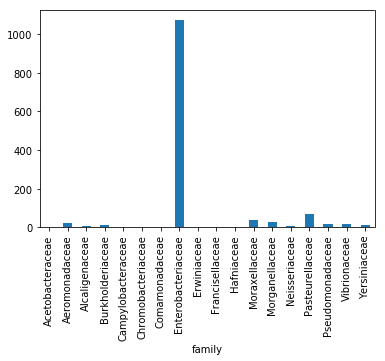

In [89]:
final_df.groupby('family').query.count().plot(kind = "bar")

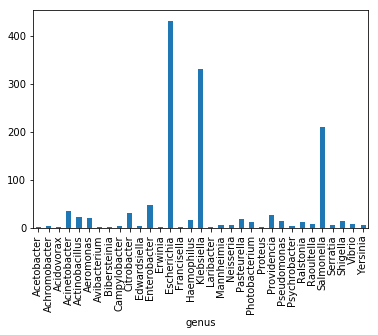

In [90]:
final_df.groupby('genus').query.count().plot(kind = "bar")